<a href="https://colab.research.google.com/github/quetion/time_series_11202/blob/main/TS_Ch1_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import statsmodels.api as sm
# test

# 建立報酬率
- 下載資料
- 理解資料欄位
- 整理資料
- 建立報酬率變數

In [8]:
# download data
# For S&P 500 index
data = yf.download('^gspc')
data.head().round(3)
# clean data
data = data['2020':]
data = data[['Adj Close']]
data.columns = ['price_spx']
data.head().round(3)
# how to obtain return
# percentage return
data['ret_spx'] = data.price_spx.pct_change()
data.head().round(3)
data['ret_spx'] = np.log(data.price_spx).diff()
data.head().round(3)

[*********************100%%**********************]  1 of 1 completed


,price_spx,ret_spx
Date,,
2020-01-02,3257.85,NaN
2020-01-03,3234.85,-0.007
2020-01-06,3246.28,0.004
2020-01-07,3237.18,-0.003
2020-01-08,3253.05,0.005


## Exercises
- 根據上述例子，觀察百分比報酬率與log報酬之間的差異，並檢定是否顯著異於零
- 下載台股加權指數並建立其報酬率變數
- 下載比特幣價格並建立報酬率變數
- 觀察這些資產的**價格走勢**與其報酬率的**相關性**

# 落後運算元
- 將當期資料移到前一期資料，我們可利用$L$進行運算
- 該運算元$L$，我們稱之為落後運算元
- Python中我們也有對應函數

In [11]:
# 落後運算元函數 .shift()
data.head()
data.ret_spx.shift()

Date
2020-01-02         NaN
2020-01-03         NaN
2020-01-06   -0.007085
2020-01-07    0.003527
2020-01-08   -0.002807
                ...   
2024-04-15   -0.014658
2024-04-16   -0.012094
2024-04-17   -0.002059
2024-04-18   -0.005797
2024-04-19   -0.002211
Name: ret_spx, Length: 1082, dtype: float64

# 模擬白噪音
- 白噪音的生成可利用標準常態分佈的亂數生成函數
- 標準常態分佈亂數生成 `np.random.randn()`
- 白噪音分佈可記為，
$$
WN(0,\sigma^2)
$$

In [ ]:
# construct a white noise
# white noise
# mean=0, variance=sigma^2
mu = 0
sigma = 1
# set random seed
#np.random.seed(1234)
wn = mu + sigma*np.random.randn(1000)

In [ ]:
wn[:5]

array([0.29120536, 0.5665337 , 0.50359176, 0.28529568, 0.48428811])

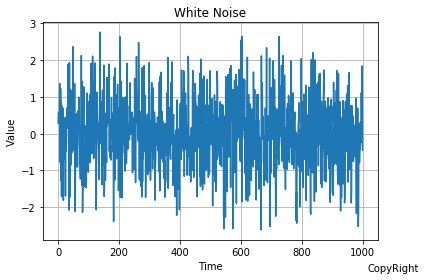

In [ ]:
plt.plot(wn)
plt.title('White Noise')
plt.xlabel('Time')
plt.ylabel('Value')
plt.figtext(0.995, 0.01, 'CopyRight', ha='right', va='bottom')
plt.grid('True')

# 自我相關係數
- 下載匯率和股價資料
- 計算一階自我相關係數 `A.corr(A.shift())`
- 比較其自我相關係數的大小
  - 分別下載資料
  - 合併資料 `pd.merge()`

In [37]:
# download exchange rate USD/EUR or TWD=X
test = yf.download('TWD=X')
test = test['2020':]
test = test[['Adj Close']]
test.columns = ['price_twdusd']
test.info()

[*********************100%%**********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1124 entries, 2020-01-01 to 2024-04-22
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price_twdusd  1124 non-null   float64
dtypes: float64(1)
memory usage: 17.6 KB


In [38]:
# merge by data.index and test.index
data = pd.merge(data,test, left_index=True, right_index=True)

In [39]:
data.head()

,price_spx,ret_spx,price_eurusd_x,price_eurusd_y,price_twdusd
Date,,,,,
2020-01-02,3257.850098,NaN,1.122083,29.844000,29.844000
2020-01-03,3234.850098,-0.007085,1.117144,29.900000,29.900000
2020-01-06,3246.280029,0.003527,1.116196,30.035000,30.035000
2020-01-07,3237.179932,-0.002807,1.119799,30.047001,30.047001
2020-01-08,3253.050049,0.004890,1.115474,29.985001,29.985001


<Axes: xlabel='Date'>

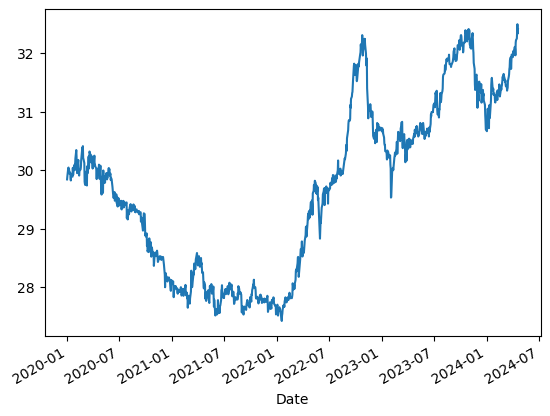

In [40]:
data.price_twdusd.plot()

In [31]:
# calculate the first-order autocorrelation of price_spx
data.price_spx.corr(data.price_spx.shift())


0.9963371235091717

# 建立固定趨勢模型
- 建立時間趨勢變數
- 建立時間趨勢模型

In [ ]:
# construct the time trend variable
twdusd['t_trend'] = range(len(twdusd.twdx))
twdusd.head()

,twdx,t_trend
Date,,
2018-12-31,30.552999,0
2019-01-01,30.565001,1
2019-01-02,30.500999,2
2019-01-03,30.759001,3
2019-01-04,30.863001,4


In [ ]:
# time-trend regression
x = sm.add_constant(twdusd['t_trend'])
y = twdusd.twdx
result = sm.OLS(y,x,missing='drop').fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   twdx   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     3535.
Date:                Thu, 11 Mar 2021   Prob (F-statistic):          6.77e-242
Time:                        12:50:43   Log-Likelihood:                -260.33
No. Observations:                 553   AIC:                             524.7
Df Residuals:                     551   BIC:                             533.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.6015      0.033    958.583      0.0

C:\Users\queti\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [ ]:
result.resid.plot()

# 建立季節性趨勢模型
- 建立季節性趨勢變數
- 建立季節性趨勢模型

In [ ]:
# 建立季節性dummy
twdusd['q_dum_1'] = 0
twdusd['q_dum_2'] = 0
twdusd['q_dum_3'] = 0

twdusd['q_dum_1'][twdusd.index.quarter == 1] = 1
twdusd['q_dum_2'][twdusd.index.quarter == 2] = 1
twdusd['q_dum_3'][twdusd.index.quarter == 3] = 1

C:\Users\queti\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\queti\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\queti\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [ ]:
# construct the season dummy into our model
x = sm.add_constant(twdusd[['q_dum_1','q_dum_2','q_dum_3']])
y = twdusd.twdx
result = sm.OLS(y,x,missing='drop').fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   twdx   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     28.10
Date:                Thu, 11 Mar 2021   Prob (F-statistic):           6.45e-17
Time:                        12:59:02   Log-Likelihood:                -774.84
No. Observations:                 553   AIC:                             1558.
Df Residuals:                     549   BIC:                             1575.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.3880      0.088    334.580      0.0

C:\Users\queti\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


# 檢驗模型的配適性


In [ ]:
# obtain the residual of the model
result.fittedvalues